In [ ]:
#Import's

import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [ ]:
df = pd.read_csv("teleCust1000t.csv")
df.head()

In [ ]:
df["custcat"].value_counts()
df.hist(column="income",bins=50)

In [ ]:
df.columns

In [ ]:
X=df[['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside']].values
X[0:5]

In [ ]:
y=df["custcat"].values
y[0:5]

In [ ]:
#Normalize

X= preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

In [ ]:
#Train/Test Split

from sklearn.model_selection import train_test_split #For Matrix and Arrays

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

In [ ]:
# KNN Clasification

from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Training

k=4
neigh=KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
neigh

In [ ]:
# Predicting

y_hat = neigh.predict(X_test)
y_hat[0:5]

In [ ]:
# Accuracy Evaluation

from sklearn import metrics
print("Train Set Accuracy:", metrics.accuracy_score(y_train,neigh.predict(X_train)))
print("Test Set Accuracy:", metrics.accuracy_score(y_test,y_hat))

In [46]:
# We can calculate the accuracy of KNN for different Ks.

ks=10
mean_acc = np.zeros((ks-1))
std_acc = np.zeros((ks-1))
ConfustionMx=[];

for n in range (1,ks):
    #Train Model and Predict
    neigh= KNeighborsClassifier(n_neighbors =n).fit(X_train,y_train)
    y_hat=neigh.predict(X_test)
    mean_acc[n-1]=metrics.accuracy_score(y_test,y_hat)
    std_acc[n-1]=np.std(y_hat==y_test)/np.sqrt(y_hat.shape[0])

print(mean_acc)
print(std_acc)
    


[0.3   0.29  0.315 0.32  0.315 0.31  0.335 0.325 0.34 ]
[0.0324037  0.03208582 0.03284623 0.03298485 0.03284623 0.03270321
 0.03337477 0.0331191  0.03349627]


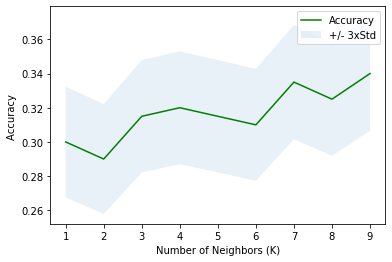

In [55]:
plt.plot(range(1,ks),mean_acc,'g')
plt.fill_between(range(1,ks),mean_acc-1*std_acc,mean_acc+1*std_acc,alpha=.10)
plt.legend(('Accuracy','+/- 3xStd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
# plt.tight_layout()
plt.show()

In [60]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.34 with k= 9
